# Introduction to matplotlib
I find matplotlib more confusing than most Python tools, but it is very important to learn, because:
* matplotlib is the most widely used visualization library in Python.  If you are reading someone else's code, there is a good chance you will understand it better if you are comfortable with matplotlib.  For example, this cool clustering image from the scikit-learn documentation ([source code](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html)) is produced using matplotlib:<br>
![Clustering image](../images/sklearn_cluster.png)
* matplotlib is highly customizable.  If you want to have control over every last detail of your figure, matplotlib is a good choice.
* Some chart types, like pie charts or 3D scatterplots, might not be available in your favorite plotting library, but are available in matplotlib.
* Some tools which might seem easier than matplotlib, like Seaborn or the plot method of a pandas DataFrame, are using matplotlib in the background.  (Actually, I think pandas can be customized to use something else, but let's ignore that.)

### Summary:
There is a vast amount of options and commands when it comes to matplotlib, and often there can be many different commands for accomplishing the same task. That said, the only syntax I want you to memorize for Math 10 is the following:
```
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
x = # some list of x-coordinates...
y = # a list of y-coordinates of the same length...
ax.plot(x,y)
```
Aside from that syntax, it is important to recognize alternative conventions that you may see others use, and of course it is important to be able to look up customizations and other types of plots.  For some examples of the types of customizations that are possible, see the [Resources](#resources) section below.

### References:

From the documentation: [Usage Guide](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) and [Lifecycle of a plot](https://matplotlib.org/stable/tutorials/introductory/lifecycle.html)

(Somewhat advanced.) From Real Python: [Real Python Matplotlib guide](https://realpython.com/python-matplotlib-guide/)

## The object oriented approach to matplotlib

The approach you will be asked to follow in Math 10, and the approach recommended by the matplotlib documentation, is the object oriented approach.  We will introduce that first, and later in this notebook we will introduce the alternative.

Relevant quote:

```
We call methods that do the plotting directly from the Axes, which gives us much more flexibility and power in customizing our plot... In general, try to use the object-oriented interface over the pyplot interface.
```

Pay close attention to the commands we use, because there are many similar looking commands which are fundamentally different.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

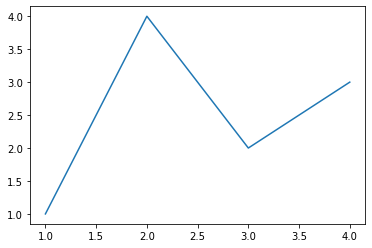

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

The first line `fig, ax = plt.subplots()` can already be intimidating.  The function plt.subplots() returns two things: The figure, which like the overall Canvas on which our plot will live, and the axes (not axis!), which can hold one or more plots.

In [3]:
type(fig)

matplotlib.figure.Figure

In [4]:
type(ax)

matplotlib.axes._subplots.AxesSubplot

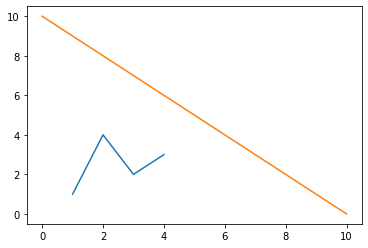

In [5]:
# Here we put another plot onto the same axes:
ax.plot([0,10],[10,0])
fig

To get rid of the weird matplotlib.lines.Line2D printout, you can put a semi-colon at the end of the final line in the cell:

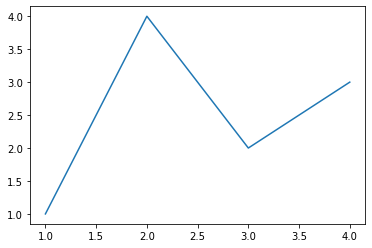

In [6]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

Plotting the graph of a function like y = cos(x) is very similar to how it could be done in Matlab: by choosing a lot of sample points and connecting them with straight lines.

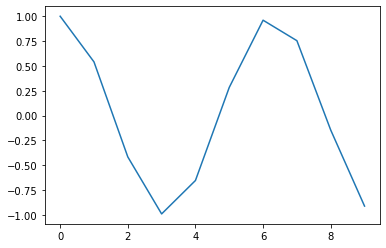

In [7]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
x = np.arange(0,10)
y = np.cos(x)
ax.plot(x,y);

Let's make it look a little nicer by using more sample points.

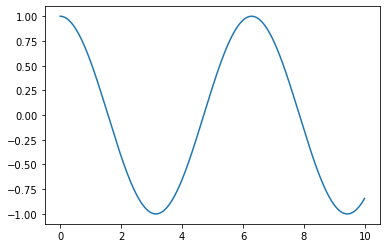

In [8]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
x = np.arange(0,10,0.01)
y = np.cos(x)
ax.plot(x,y);

I don't know how often it will be useful to us, but matplotlib makes it very eash to put many different axes on the same figure.  Here we put ten onto the same figure:

In [9]:
fig, ax = plt.subplots(2,5)
plt.close(fig) # prevent the figure from displaying for now.

Now ax is no longer a matplotlib axes object, but instead is a numpy array of those objects.

In [10]:
type(ax)

numpy.ndarray

In [11]:
ax.shape

(2, 5)

In [12]:
type(ax[1,3])

matplotlib.axes._subplots.AxesSubplot

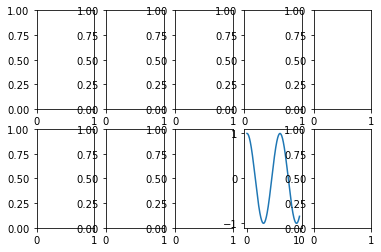

In [13]:
ax[1,3].plot(x,y);
fig

Ironically, using a "tight" layout seems to increase the spacing:

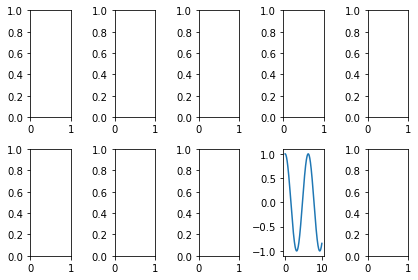

In [14]:
fig.tight_layout()
fig

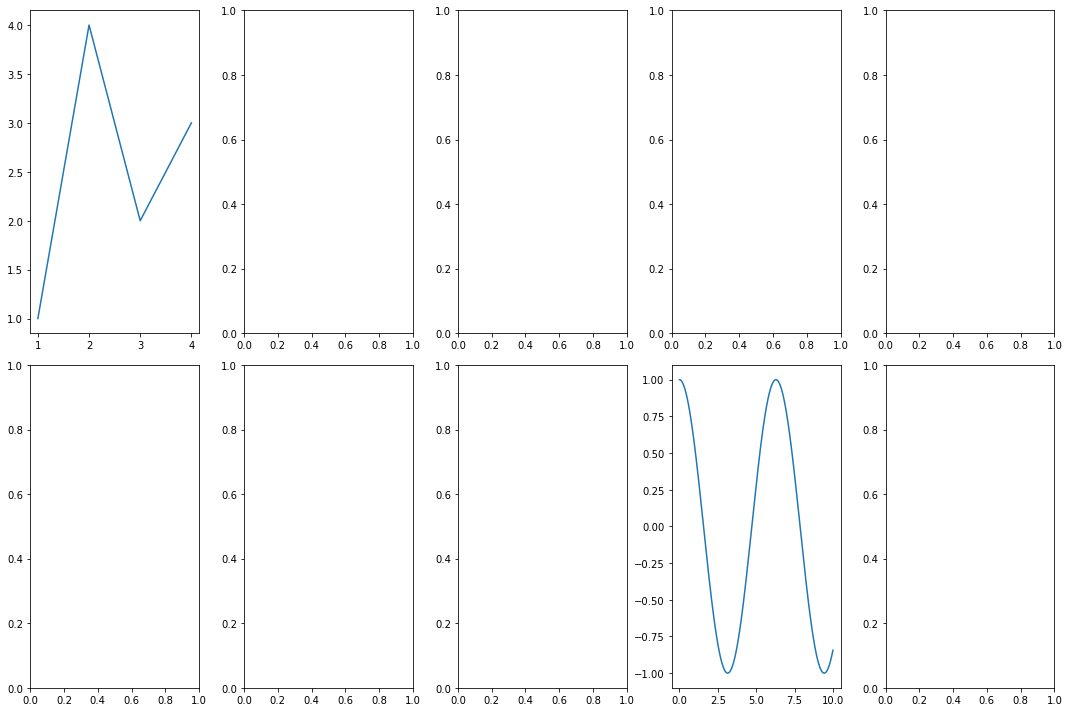

In [15]:
fig, ax = plt.subplots(2,5,figsize=(15,10))
fig.tight_layout()
ax[0,0].plot([1, 2, 3, 4], [1, 4, 2, 3])
ax[1,3].plot(x,y);

The reason what we've been doing above is called the "object oriented" approach, is because we are focusing on specific axes objects and calling methods on those, like our `ax[1,3].plot(x,y)` should be seen as taking the object `ax[1,3]` and then calling its plot method.  You should follow this object oriented approach in Math 10, but it is useful to be aware of the other method.  Because the other method often takes less writing, many people use it, but in Math 10, we are taking the mindset, that "explicit is better than implicit".

## The state-based approach to matplotlib
Our preferred method in Math 10 is to use code like `ax.plot(x,y)`.  An alternative is to use `plt.plot(x,y)`, and you will often see that sort of notation used, and it's important to be aware of it.  Notice that plt is not an object; it is the name we gave to the PyPlot library when we imported it.

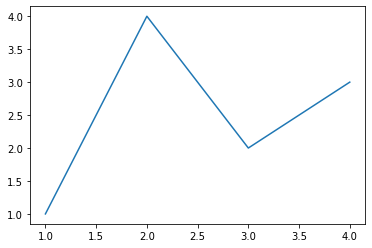

In [16]:
plt.plot([1, 2, 3, 4], [1, 4, 2, 3]);

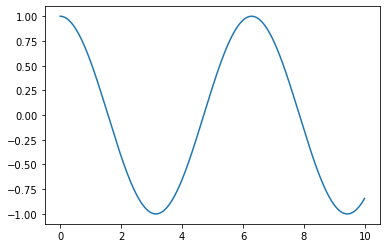

In [17]:
# You can get rid of the weird text by adding a semi-colon.
plt.plot(x,y)

Why is it important to know about this other method?  Here is some code that I adapted from a website called [Stack Abuse](https://stackabuse.com/how-to-set-axis-range-xlim-ylim-in-matplotlib).  Notice that the plt.xlim command is only affecting the most recently defined axes.

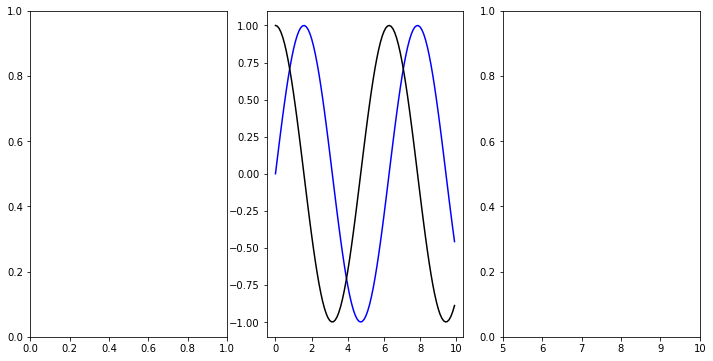

In [18]:
fig, ax = plt.subplots(1,3,figsize=(12, 6))

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)

ax[1].plot(x,y, color='blue', label='Sine wave')
ax[1].plot(x,z, color='black', label='Cosine wave')

plt.xlim([5, 10]);

I had hoped that the following adaptation would work, where I replace `plt.xlim([5, 10])` with `ax[1].xlim([5,10])`, but it did not work:

AttributeError: 'AxesSubplot' object has no attribute 'xlim'

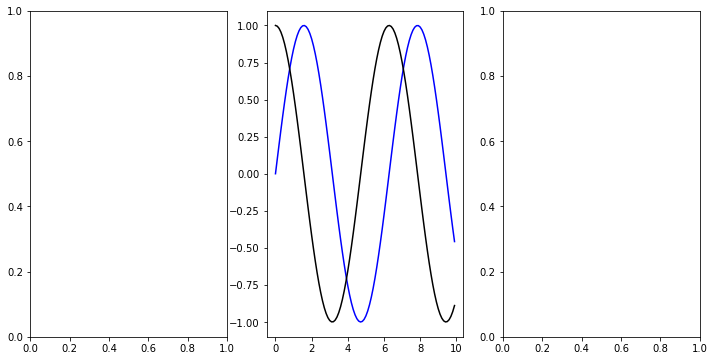

In [19]:
fig, ax = plt.subplots(1,3,figsize=(12, 6))

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)

ax[1].plot(x,y, color='blue', label='Sine wave')
ax[1].plot(x,z, color='black', label='Cosine wave')

ax[1].xlim([5, 10]);

Here is the corresponding object oriented command.  The old code `plt.xlim` gets replaced by `ax[1].set_xlim`.  (There's nothing special about the [1], the important thing is that what comes before the `.set_xlim` should be a matplotlib axes object.)

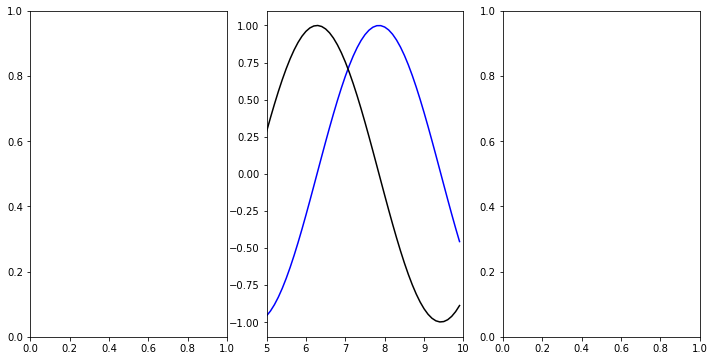

In [20]:
fig, ax = plt.subplots(1,3,figsize=(12, 6))

x = np.arange(0, 10, 0.1)
y = np.sin(x)
z = np.cos(x)

ax[1].plot(x,y, color='blue', label='Sine wave')
ax[1].plot(x,z, color='black', label='Cosine wave')

ax[1].set_xlim([5, 10]);

## Other common notations (that we will try to avoid in Math 10)
`plt.show()` is necessary in many contexts for displaying the figure, but for the way we have our Jupyter notebooks set up, using the "magic" command `%matplotlib inline` at the beginning, the explicit command to show the figure is not necessary, it shows automatically at the end of each cell.

There are some alternatives to `%matplotlib inline`, including `%matplotlib notebook`, `%matplotlib widget`, `%matplotlib ipympl`.  (Some of these may only be part of Jupyter Lab, and not Jupyter Notebooks, and conversely, I believe `%matplotlib notebook` will not work with Jupyter Lab.)  With the set-up used above, when we evaluate a command in a new cell like `plt.plot(x,y)`, it creates a new figure automatically.  With some other set-ups, I believe it would instead update the most recent axes object instead.

You should get in the habit of using `fig, ax = plt.subplots()` to generate new figures.  Here is a very similar looking command that we will *not* use, but that you may see in other people's code.  Notice that in the following code, the word used is "subplot" instead of "subplots".

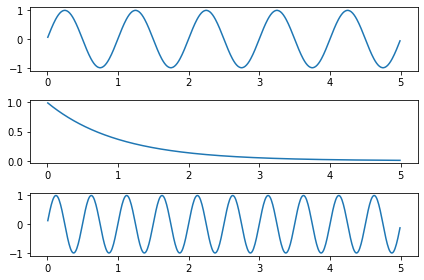

In [21]:
t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2 * np.pi * t)
s2 = np.exp(-t)
s3 = np.sin(4 * np.pi * t)

ax1 = plt.subplot(311) # This says: make a 3x1 grid of axes, and go to the 1st.
plt.plot(t, s1)

ax2 = plt.subplot(312) # This says: make a 3x1 grid of axes, and go to the 2nd.
plt.plot(t, s2)

ax3 = plt.subplot(313) # This says: make a 3x1 grid of axes, and go to the 3rd.
plt.plot(t, s3);

plt.tight_layout() # I originally had this tight_layout() at the top of the cell and it didn't work.

## Resources <a name="resources"></a>
Here is an idea of some of the aspects of the figures that can be customized:
![](../images/mpl-anatomy.webp)
And here are some ["cheat sheets"](https://github.com/matplotlib/cheatsheets):<br>
![cheatsheet-1](../images/mpl-cheatsheets-1.png)
![cheatsheet-2](../images/mpl-cheatsheets-2.png)
![beginner-ref](../images/mpl-handout-beginner.png)
![intermediate-ref](../images/mpl-handout-intermediate.png)
![tips](../images/mpl-handout-tips.png)